**FACEBOOK DATASET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Facebook_Marketplace_data.csv')
print(df)

      status_id status_type status_published  num_reactions  num_comments  \
0             1       video   4/22/2018 6:00            529           512   
1             2       photo  4/21/2018 22:45            150             0   
2             3       video   4/21/2018 6:17            227           236   
3             4       photo   4/21/2018 2:29            111             0   
4             5       photo   4/18/2018 3:22            213             0   
...         ...         ...              ...            ...           ...   
7045       7046       photo   9/24/2016 2:58             89             0   
7046       7047       photo  9/23/2016 11:19             16             0   
7047       7048       photo  9/21/2016 23:03              2             0   
7048       7049       photo   9/20/2016 0:43            351            12   
7049       7050       photo  9/10/2016 10:30             17             0   

      num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0 

In [ ]:
df.isna().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


In [ ]:
#Data Preprocessing
#Removing Nan value column 1 to column 4 as it does not have any relationship with the dataset
columns_drop=['Column1','Column2','Column3','Column4']
df_filtered=df.drop(columns=columns_drop,axis=1)
print(df_filtered)

      status_id status_type status_published  num_reactions  num_comments  \
0             1       video   4/22/2018 6:00            529           512   
1             2       photo  4/21/2018 22:45            150             0   
2             3       video   4/21/2018 6:17            227           236   
3             4       photo   4/21/2018 2:29            111             0   
4             5       photo   4/18/2018 3:22            213             0   
...         ...         ...              ...            ...           ...   
7045       7046       photo   9/24/2016 2:58             89             0   
7046       7047       photo  9/23/2016 11:19             16             0   
7047       7048       photo  9/21/2016 23:03              2             0   
7048       7049       photo   9/20/2016 0:43            351            12   
7049       7050       photo  9/10/2016 10:30             17             0   

      num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0 

In [ ]:
df_filtered.isna().sum()

,0
status_id,0
status_type,0
status_published,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0


Questions:

1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

2. Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.
4.	Use the elbow method to find the optimum number of clusters.
5.	What is the count of different types of posts in the dataset?
6.	What is the average value of num_reaction, num_comments, num_shares for each post type?
*italicized text*

1) status_upload and num_reaction

In [ ]:
#1
#Convert date to ML understandable format
df_filtered['status_published']=pd.to_datetime(df_filtered['status_published'])
df_filtered['year'] = df_filtered['status_published'].dt.year
df_filtered['month'] = df_filtered['status_published'].dt.month
df_filtered['day'] = df_filtered['status_published'].dt.day
df_filtered['hour'] = df_filtered['status_published'].dt.hour
df_filtered['day_of_week'] = df_filtered['status_published'].dt.dayofweek
df_filtered['is_weekend'] = df_filtered['status_published'].dt.dayofweek.isin([5, 6]).astype(int)
print(df_filtered)

      status_id status_type    status_published  num_reactions  num_comments  \
0             1       video 2018-04-22 06:00:00            529           512   
1             2       photo 2018-04-21 22:45:00            150             0   
2             3       video 2018-04-21 06:17:00            227           236   
3             4       photo 2018-04-21 02:29:00            111             0   
4             5       photo 2018-04-18 03:22:00            213             0   
...         ...         ...                 ...            ...           ...   
7045       7046       photo 2016-09-24 02:58:00             89             0   
7046       7047       photo 2016-09-23 11:19:00             16             0   
7047       7048       photo 2016-09-21 23:03:00              2             0   
7048       7049       photo 2016-09-20 00:43:00            351            12   
7049       7050       photo 2016-09-10 10:30:00             17             0   

      num_shares  num_likes  num_loves 

In [ ]:
#Time of upload affecting the status_published

df_filtered['hour'] = df_filtered['status_published'].dt.hour
avg_reactions_hour = df_filtered.groupby('hour')['num_reactions'].mean().reset_index()
print(avg_reactions_hour)

    hour  num_reactions
0      0     261.839474
1      1     203.315725
2      2     163.907618
3      3     290.270208
4      4     242.685864
5      5     293.870968
6      6     340.213198
7      7     183.301549
8      8     204.796897
9      9     205.780761
10    10     234.508333
11    11     180.639456
12    12     196.053763
13    13     176.875000
14    14     261.333333
15    15     341.666667
16    16     283.250000
17    17     384.000000
18    18     351.750000
19    19     442.368421
20    20     417.288136
21    21     261.907895
22    22     238.376126
23    23     244.276850


2) Correlation Matrix

In [ ]:
#2 We will use correlation matrix to solve this

corr_value = df_filtered[['num_reactions', 'num_comments', 'num_shares']].corr()
print(corr_value)

'''1 signifies a perfect positive correlation (variables rise/fall together),
-1 indicates a perfect negative correlation (one rises as the other falls proportionally),
and 0 means there's no linear relationship between the variables.
Values between 0 and 1 (or -1) show the strength and direction of the relationship,
with values closer to 1 or -1 indicating a stronger link and values closer to 0 showing a weaker link'''


               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


"1 signifies a perfect positive correlation (variables rise/fall together),\n-1 indicates a perfect negative correlation (one rises as the other falls proportionally),\nand 0 means there's no linear relationship between the variables.\nValues between 0 and 1 (or -1) show the strength and direction of the relationship,\nwith values closer to 1 or -1 indicating a stronger link and values closer to 0 showing a weaker link"

In [ ]:
"""num_reactions and num_comments: The correlation coefficient is 0.150843.
This indicates a weak positive correlation.
This means that as the number of reactions increases, the number of comments tends to slightly increase,
but the relationship is not very strong.

num_reactions and num_shares: The correlation coefficient is 0.250723.
This also indicates a weak positive correlation, slightly stronger than with comments.
So, as reactions increase, shares also tend to slightly increase.

num_comments and num_shares: The correlation coefficient is 0.640637.
This shows a moderate to strong positive correlation.
This means there is a significant tendency for the number of comments and the number of shares to increase or decrease together."""

'num_reactions and num_comments: The correlation coefficient is 0.150843.\nThis indicates a weak positive correlation.\nThis means that as the number of reactions increases, the number of comments tends to slightly increase,\nbut the relationship is not very strong.\n\nnum_reactions and num_shares: The correlation coefficient is 0.250723.\nThis also indicates a weak positive correlation, slightly stronger than with comments.\nSo, as reactions increase, shares also tend to slightly increase.\n\nnum_comments and num_shares: The correlation coefficient is 0.640637.\nThis shows a moderate to strong positive correlation.\nThis means there is a significant tendency for the number of comments and the number of shares to increase or decrease together.'

3) Kmeans Clustering


In [ ]:
#3 K means clustering
from sklearn.cluster import KMeans
a=['status_type','num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']
X=df_filtered[a]

#Applying one hot encoding for the status_type
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)



[[0. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Finding the number of clusters using elbow method
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(wcss)


[8645689584.700117]
[8645689584.700117, 4986395385.977707]
[8645689584.700117, 4986395385.977707, 2735261382.8729267]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.4372087]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.4372087, 1019987450.8361536]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.4372087, 1019987450.8361536, 788712847.4456558]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.4372087, 1019987450.8361536, 788712847.4456558, 653058126.672366]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.43

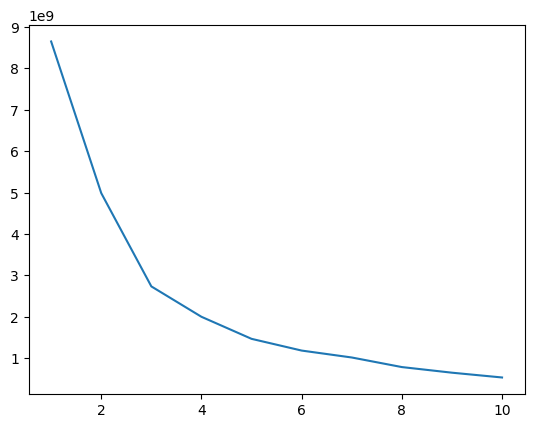

In [ ]:
plt.plot(range(1,11),wcss)
plt.show()

In [ ]:
#From the graph we can see that the optimal number of clusters would be 3 therefore to train the model we take the number of clusters to be 3
k_means=KMeans(n_clusters =3, init = 'k-means++',random_state = 42)
ymean=k_means.fit_predict(X)
print(ymean)

[0 0 0 ... 0 0 0]


4) Elbow Method

In [ ]:
#converting the status_type to a numerical format
b=['status_type','num_reactions','num_comments','num_shares','num_likes','num_loves','num_wows','num_hahas','num_sads','num_angrys']
X=df_filtered[b]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y= ct.fit_transform(X)
print(y)



[[0. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Using elbow method
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(y)
  wcss.append(kmeans.inertia_)
  print(wcss)

[8645689584.700117]
[8645689584.700117, 4986395385.977707]
[8645689584.700117, 4986395385.977707, 2735261382.8729267]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.4372087]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.4372087, 1019987450.8361536]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.4372087, 1019987450.8361536, 788712847.4456558]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.4372087, 1019987450.8361536, 788712847.4456558, 653058126.672366]
[8645689584.700117, 4986395385.977707, 2735261382.8729267, 2002151653.9221268, 1469927237.5282652, 1186923961.43

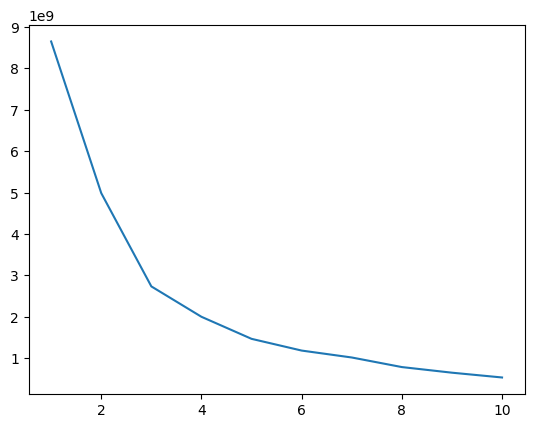

In [ ]:
plt.plot(range(1,11),wcss)
plt.show()

5) Count of different types of posts

In [ ]:
n=df_filtered['status_type']
m=n.value_counts()
print(m)


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


6) Average value for each post type

In [ ]:
average_post_type = df_filtered.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(average_post_type)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
